# Task 1: Modeling

Choosing a binomial likelihood function is probably the most appropriate for three reasons: first, the random variable I am choosing to model is the number of improved cases in the population which is discrete; second, the binomial distribution describes the probability of the number of an event happening (in this case improvement) through a number of independent trials (assuming the results of each participant and the rating is independent of each other); third, the binomial distribution is a conjugate likelihood for the prior of beta, which can be describes as the rate of improvement in the population, making it also a proper choice for our prior.


The unobserved parameter for our likelihood is the rate of improvement happening (the probability of improvement happening) which is also the variable of the prior. 

As a conjugate prior I choose the beta distribution with $\alpha=1$ and $\beta=1$ as parameters to create a uniform distribution. This is because I do not have any knowledge that specify the possible range of the probability of improvement, so I must assume that it is uniformly distributed (any value of probability is equally likely). 

In [2]:
% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import beta
import scipy

108.0
35.0


<IPython.core.display.Javascript object>


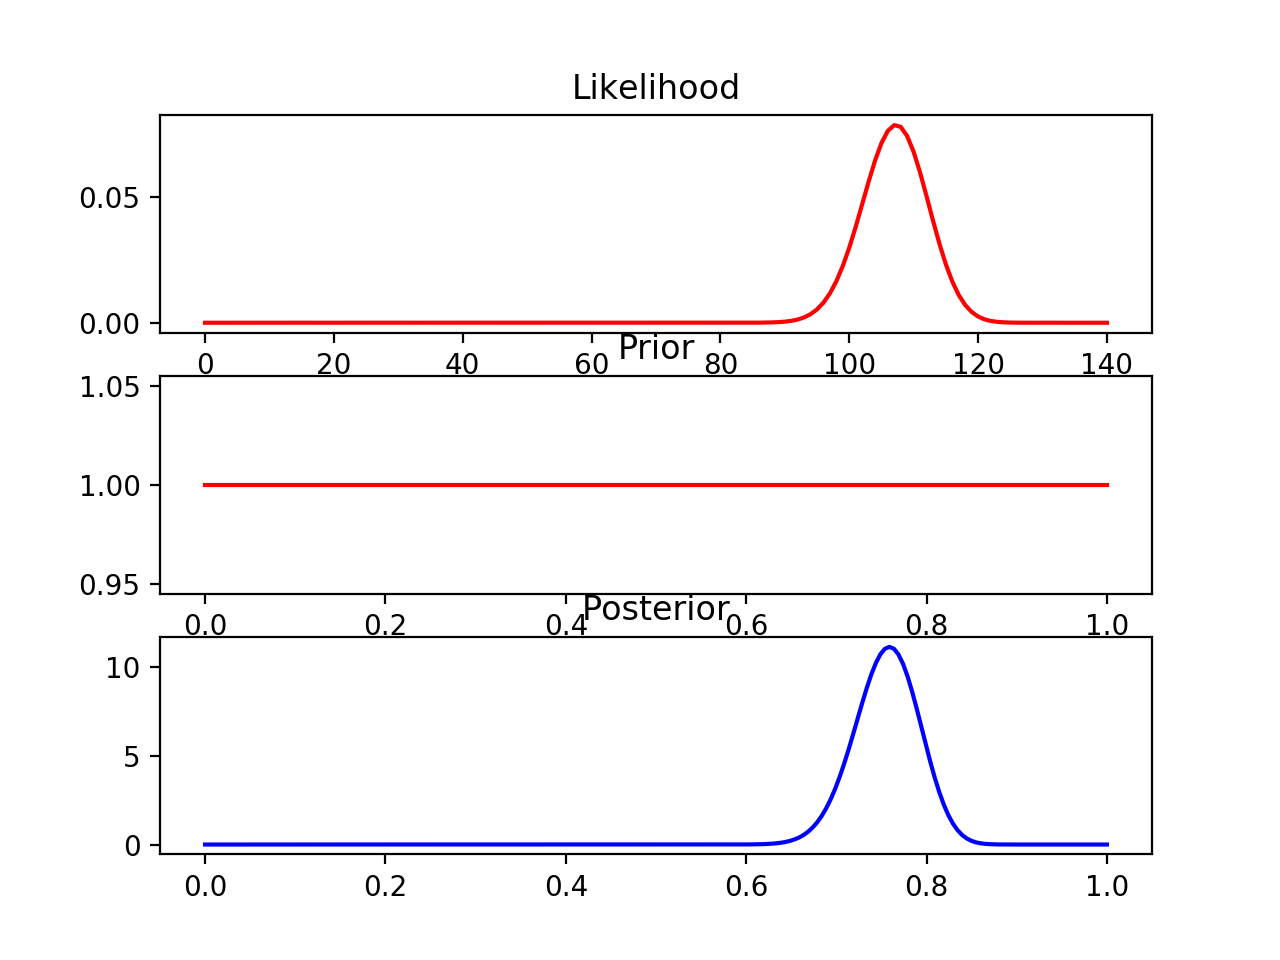

In [3]:
N = 107 + 34 
p = 107/N 
a_prior = 1 
b_prior = 1 

likelihood = stats.binom(p=p, n=N)
prior = stats.beta(a=a_prior, b=b_prior)

a_post = a_prior + N*p
b_post = b_prior + N - N*p
print(a_post)
print(b_post)

posterior = stats.beta(a=a_post, b=b_post)

x_prior = np.linspace(0,1,200)
x_like = [_ for _ in range(N)]

plt.subplot(3,1,1)
plt.plot(x_like, likelihood.pmf(x_like), color='red')
plt.title('Likelihood')

plt.subplot(3,1,2)
plt.plot(x_prior , prior.pdf(x_prior), color='red')
plt.title('Prior')

plt.subplot(3,1,3)
plt.plot(x_prior , posterior.pdf(x_prior), color='blue')
plt.title('Posterior')

plt.show()

The posterior tells us that the probability of improvement peaks at around 0.75, with one update from our data. 

# Task 2

<IPython.core.display.Javascript object>


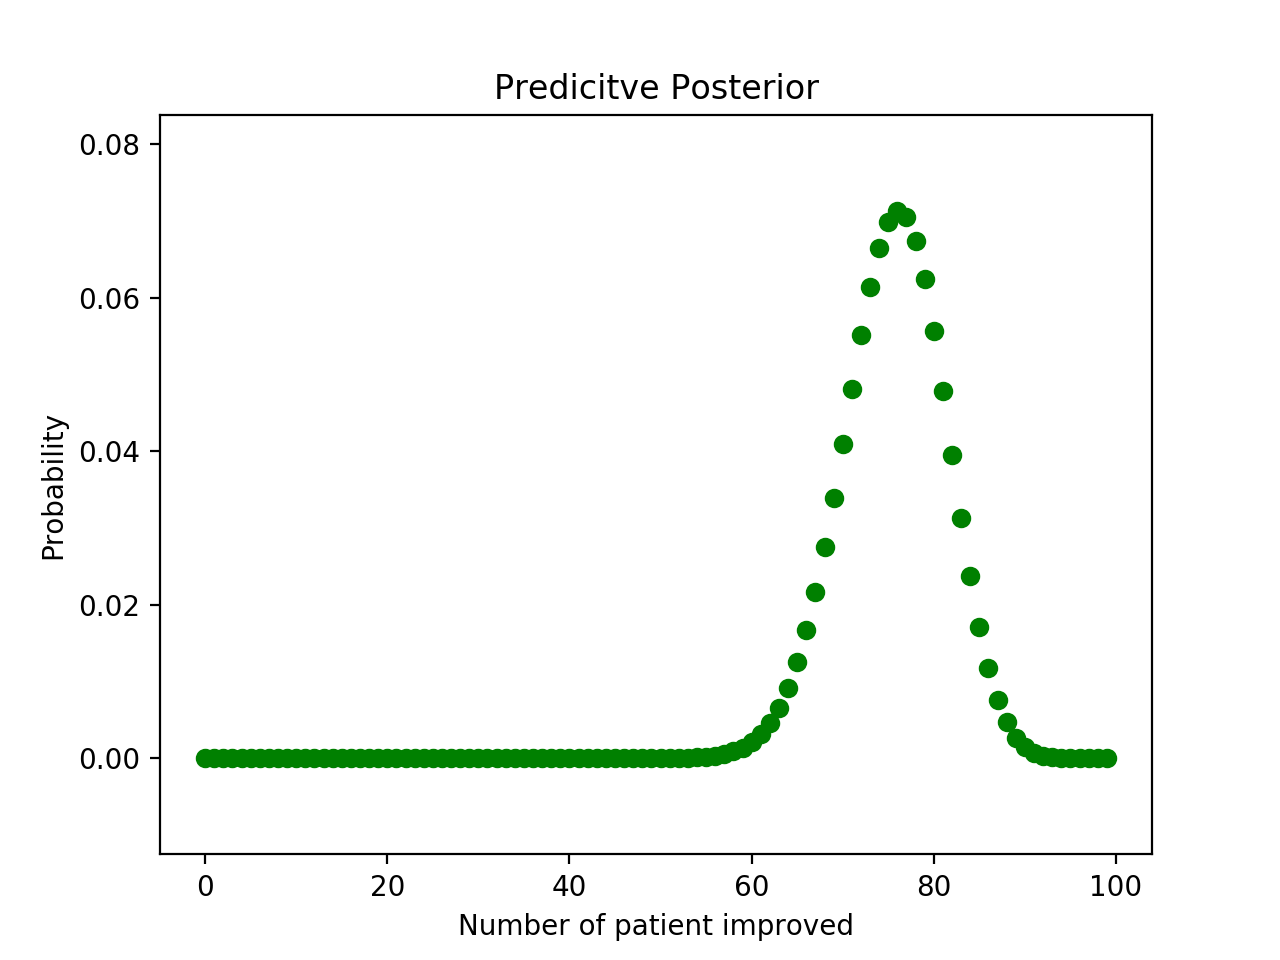

In [17]:
def predictive_posterior(k, N, a, b): 
    return scipy.special.comb(N, k)*beta(k+a, N-k+b)/beta(a,b)

x_pred_post = [_ for _ in range(100)]
y_pred_post = [predictive_posterior(_, 100, a_post, b_post) for _ in x_pred_post]

plt.scatter(x_pred_post, y_pred_post, color='green')
plt.title('Predicitve Posterior')
plt.ylabel('Probability')
plt.xlabel('Number of patient improved')
plt.show()

In [20]:
print('Probability of at least 2/3 of the population works with SIT on eczema', 1 - posterior.cdf(0.66))
print('Probability of at least 75% of the population works with SIT on eczema', 1 - posterior.cdf(0.75))

Probability of at least 2/3 of the population works with SIT on eczema 0.9937862876716046
Probability of at least 75% of the population works with SIT on eczema 0.5706496661069852


The treatment works as far as the available data tells us: nearly 80% of the population will report improvement with eczema by being treated with SIT and N=141 is a reasonable size population. Unless we figure out there is dependencies in the reported results (rendering our choice of likelihood function as binomial problematic) or there is inherent bias in the data (the 141 people chosen were just picked from a group that reacts super positively with SIT), we have no reason to believe that our treatment does not work. 